# Custom Color Wheel

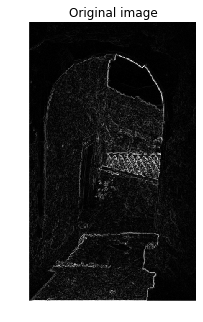

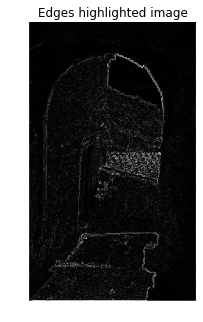

In [27]:
# Used http://juanreyero.com/article/python/python-convolution.html
# as a reference

## Adds all the needed python libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from scipy import signal as sg
from skimage import color

# Matplot defaults
plt.rcParams['image.cmap'] = 'gray' # Display grayscale images in... grayscale.
plt.rcParams['image.interpolation'] = 'none' # Use nearest-neighbour
plt.rcParams['figure.figsize'] = 5, 5 # Sets the default figure size

# Open the image as an array. Make sure that the image we read is stored
# as an array of floats.
def np_from_img(fname):
    # Handle hsv images
    img = np.asarray(Image.open(fname), dtype=np.float32)
    if img.ndim == 3:
        img = color.hsv2rgb(img)
    return img


# Normalize the image. Normalization is a process that changes the range 
# of pixel intensity values.
def norm(ar):
    return 255.*np.absolute(ar)/np.max(ar)

# Normalize and round before saving back as 8-bit integers.
# ar -> normalized array
# fname -> file name to save as
def save_as_img(ar, fname):
    Image.fromarray(ar.round().astype(np.uint8)).save(fname)

# Takes two arrays and chops them off as required,
# so that they end up having the same size:
def common_size(a1, a2):
    """Chop-off the first rows and cols from the two numpy arrays a1
    and a2 so that they end up having the same size.
    >>> print common_size(np.array([[0, 0],
    ...                             [1, 2],
    ...                             [3, 4]]),
    ...                   np.array([[0, 5, 6],
    ...                             [0, 7, 8]]))
    (array([[1, 2],
           [3, 4]]), array([[5, 6],
           [7, 8]]))
    """
    (r1, c1) = a1.shape
    (r2, c2) = a2.shape
    return (a1[r1-r2 if r1>r2 else 0:,
               c1-c2 if c1>c2 else 0:],
            a2[r2-r1 if r2>r1 else 0::,
               c2-c1 if c2>c1 else 0:])

# Combine the horizontal and vertical edges. Now it detects
# both of them. We compute the length of a vector that the horizontal
# edges and the vertical edges would form on any given point.
# A convolution with (1, -1) finds the vertical edges, and
# a convolution with (1, -1).T finds the horizontal edges.
def gradient(im):
    imv, imh = common_size(sg.convolve(im, [[1., -1.]]),
                           sg.convolve(im, [[1.], [-1.]]))
    return np.sqrt(np.power(imv, 2)+np.power(imh, 2))    
    
# Open the image.
img = np_from_img('images/portal.png')

# Find the horizontal and vertical edges.
img_edge_detection = gradient(img)

# Save the image with the edges highlighted.
save_as_img(norm(img_edge_detection), 'images/portal.png')

# Display the original image
plt.figure(1)
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

# Display the image with edges highlighted
plt.figure(2)
plt.axis('off')
plt.title('Edges highlighted image')
plt.imshow(img_edge_detection)

